# Plots for census experiments
Python code to generate the plots from the matlab experiments.

In [1]:
import numpy as np
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParams['pdf.fonttype'] = 42
#matplotlib.rcParams['text.usetex'] = True

In [2]:
#matplotlib.rcParams['ps.useafm'] = True
#matplotlib.rcParams['pdf.use14corefonts'] = True
#matplotlib.rcParams['text.usetex'] = True

params =  {'pdf.fonttype' : 42,
          'legend.fontsize': 14,
          'axes.labelsize': 18,
          'axes.titlesize': 20,
          'xtick.labelsize' :14,
          'ytick.labelsize': 14,
          'mathtext.fontset' : 'stix',
          'mathtext.rm'      : 'serif',
          'font.family'      : 'serif',
          'font.serif'       : "Times New Roman", # or "Times"          
         }
matplotlib.rcParams.update(params)

In [3]:
pwd

'/Users/cdickens/Desktop/hlr-clean/high-leverage-rows-camera-ready/figures'

In [4]:
# Load in all of the generated data
mat_identity = spio.loadmat('../scripts/census/regression/census_identity.mat', squeeze_me=True)
mat_orth = spio.loadmat('../scripts/census/regression/census_orth.mat', squeeze_me=True)
mat_spc3 = spio.loadmat('../scripts/census/regression/census_condition_spc3.mat', squeeze_me=True)
mat_uniform = spio.loadmat('../scripts/census/regression/census_uniform_sampling.mat', squeeze_me=True)

In [5]:
mat_uniform

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jun  4 06:52:57 2018',
 '__version__': '1.0',
 'approx_regression_time': array([0.3180122 , 0.58599651, 0.87927981, 1.16701804, 1.42319952,
        1.71543741, 1.99923478, 2.29458293, 2.59968938, 2.90058582]),
 'block_sizes': array([ 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000,
        450000, 500000], dtype=int32),
 'error': array([0.02762415, 0.02016094, 0.02060732, 0.02142059, 0.02023301,
        0.01221346, 0.01399404, 0.01583531, 0.01400494, 0.01227385]),
 'number_of_samples': 5000000}

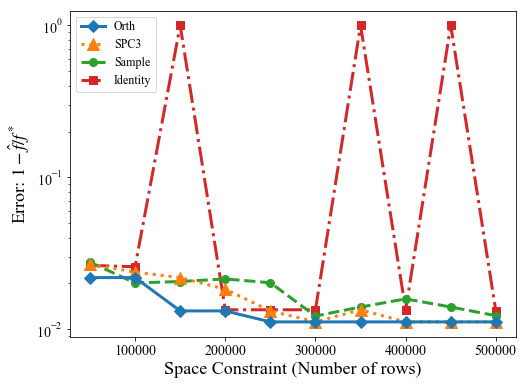

In [6]:
mean_id = np.mean(mat_identity['error'])*np.ones_like(mat_identity['error'])
# Error vs block size plot

#SetPlotRC()
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['error'],'-D', label = 'Orth', linewidth=3.0, markersize=8, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['error'], ':^', label = 'SPC3', linewidth=3.0, markersize=12, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['error'], '--o', label = 'Sample',linewidth=3.0, markersize=8, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['error'], '-.s', label = 'Identity', linewidth=3.0, markersize=8, zorder=2)

ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Error: $1 - \hat{f}/f^*$')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Error vs Block Size", fontsize=18)
ax.legend(loc=2, fontsize=12)

#ApplyFont(plt.gca())
fig.savefig('census_error_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

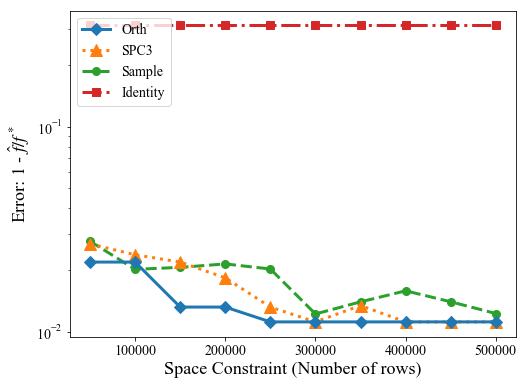

In [7]:
mean_id = np.mean(mat_identity['error'])*np.ones_like(mat_identity['error'])
# Error vs block size plot
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['error'],'-D', label = 'Orth', linewidth=3.0, markersize=8, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['error'], ':^', label = 'SPC3', linewidth=3.0, markersize=12, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['error'], '--o', label = 'Sample',linewidth=3.0, markersize=8, zorder=4)
ax.plot( mat_identity['block_sizes'], mean_id, '-.s', label = 'Identity', linewidth=3.0, markersize=8, zorder=2)

ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Error: 1 - $\hat{f}/f^*$')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Error vs Block Size", fontsize=18)
ax.legend(loc=2, fancybox=True)

fig.savefig('census_error_vs_block_size_MEAN_IDENTITY.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

In [8]:
import numpy as np
summary_error_orth = np.vstack((mat_orth['storage'], mat_orth['error'])).T
summary_error_orth[summary_error_orth[:,1].argsort()]
#summary_error #= np.sort(summary_error, axis=0)


summary_error_mat_spc3 = np.vstack((mat_spc3['storage'], mat_spc3['error'])).T
summary_error_mat_spc3[summary_error_mat_spc3[:,1].argsort()]


array([[1.45604000e+05, 1.11723114e-02],
       [1.39478000e+05, 1.11723114e-02],
       [2.17407000e+05, 1.11723114e-02],
       [1.83411000e+05, 1.11723114e-02],
       [8.36840000e+04, 1.31977411e-02],
       [1.72710000e+05, 1.34263343e-02],
       [7.03340000e+04, 1.83211451e-02],
       [8.75840000e+04, 2.18723629e-02],
       [4.75500000e+04, 2.37503920e-02],
       [1.99160000e+04, 2.67994209e-02]])

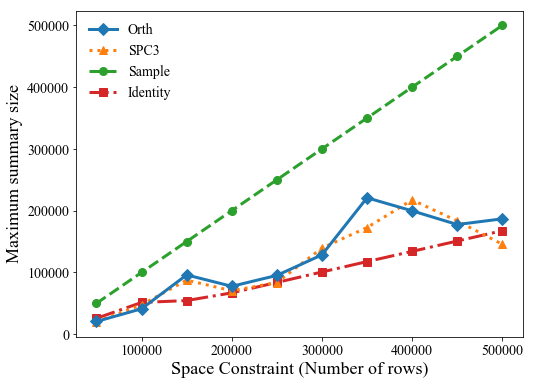

In [9]:
# Max summary size vs block size

fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['storage'],'-D', label = 'Orth', linewidth=3.0, markersize=8, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['storage'], ':^', label = 'SPC3', linewidth=3.0, markersize=8, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['block_sizes'], '--o', label = 'Sample',linewidth=3.0, markersize=8, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['storage'], '-.s', label = 'Identity', linewidth=3.0, markersize=8, zorder=2)

ax.set_ylabel('Maximum summary size')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Max rows stored (in stream) vs Block Size")
ax.legend(loc=0, frameon=False)

fig.savefig('census_space_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

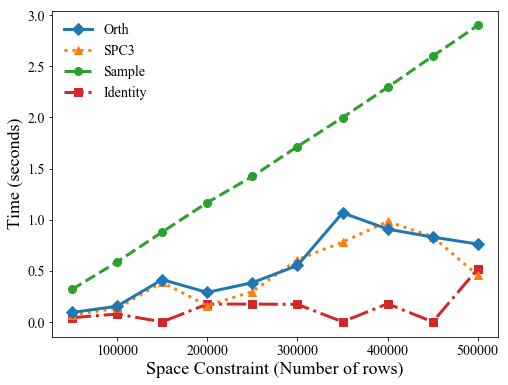

In [10]:
# Time to solve regression

fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['approx_regression_time'],'-D', label = 'Orth', linewidth=3.0, markersize=8, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['approx_regression_time'], ':^', label = 'SPC3', linewidth=3.0, markersize=8, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], '--o', label = 'Sample',linewidth=3.0, markersize=8, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['approx_regression_time'], '-.s', label = 'Identity', linewidth=3.0, markersize=8, zorder=2)


#ax.plot( mat_orth['block_sizes'], mat_orth['approx_regression_time'], label = 'Orth', linewidth=3.0, zorder=10)
#ax.plot( mat_spc3['block_sizes'], mat_spc3['approx_regression_time'], label = 'SPC3', linewidth=3.0, zorder=8)
#ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], label = 'Sample',linewidth=3.0, zorder=4)
#ax.plot( mat_identity['block_sizes'],mat_identity['approx_regression_time'],label = 'Identity', linewidth=3.0, zorder=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Time to solve regression vs Block Size")
ax.legend(loc=0, frameon=False)

fig.savefig('census_regression_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

In [11]:
mat_spc3['full_regression_time'][0:10]

array([30.7285761, 30.7285761, 30.7285761, 30.7285761, 30.7285761,
       30.7285761, 30.7285761, 30.7285761, 30.7285761, 30.7285761])

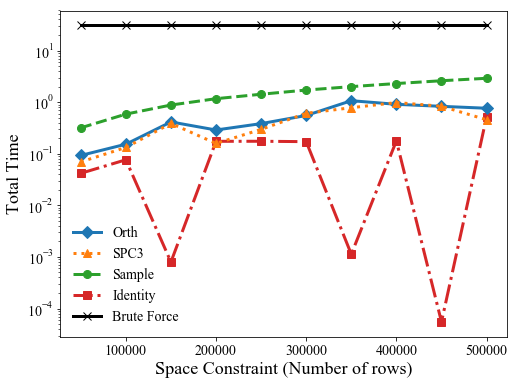

In [12]:
# Total time
plotting_length  = mat_spc3['block_sizes'].shape[0]
full_regression_time = mat_spc3['full_regression_time'][0:plotting_length]

fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['total_time'],'-D', label = 'Orth', linewidth=3.0, markersize=8, zorder=8)
ax.plot( mat_spc3['block_sizes'], mat_spc3['total_time'], ':^', label = 'SPC3', linewidth=3.0, markersize=8, zorder=10)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], '--o', label = 'Sample',linewidth=3.0, markersize=8, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['total_time'], '-.s', label = 'Identity', linewidth=3.0, markersize=8, zorder=2)
ax.plot(mat_spc3['block_sizes'], full_regression_time, '-x', color='black', label = 'Brute Force',linewidth=3.0, markersize=8)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Total Time')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Total Time  vs Block Size")
ax.legend(loc=3, fancybox=True, frameon=False)

fig.savefig('census_total_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

### Basis times

Code to generate the plots which illustrate how long it takes to compute well-conditioned bases.

In [13]:
basis_orth = spio.loadmat('../scripts/census/basis_times/census_condition_spc3_basis_times.mat', squeeze_me=True)
basis_spc3 = spio.loadmat('../scripts/census/basis_times/census_orth_basis_times.mat', squeeze_me=True)


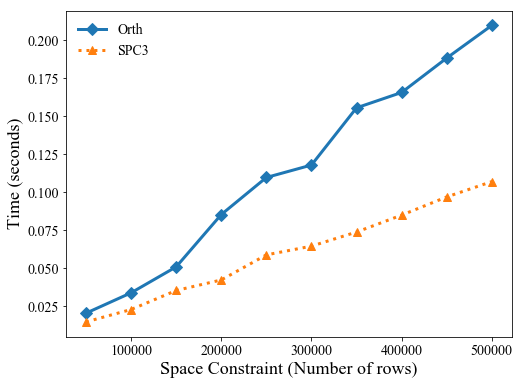

In [14]:
# Basis time vs block size

fig, ax = plt.subplots(figsize=(8,6))

ax.plot( basis_orth['block_sizes'], basis_orth['time_for_basis'],'-D', label = 'Orth' , markersize=8, linewidth=3.0)
ax.plot( basis_spc3['block_sizes'], basis_spc3['time_for_basis'], ':^',label = 'SPC3', markersize=8, linewidth=3.0)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time (seconds)')
ax.set_xlabel('Space Constraint (Number of rows)')
#ax.set_title("Time to compute basis  vs Block size", fontsize=18)
ax.legend(loc=0, frameon=False)


fig.savefig('census_basis_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

In [15]:
basis_orth

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jun  4 09:48:51 2018',
 '__version__': '1.0',
 'block_sizes': array([ 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000,
        450000, 500000], dtype=int32),
 'number_of_samples': 5000000,
 'time_for_basis': array([0.0205563 , 0.03393898, 0.05099806, 0.0853699 , 0.10972463,
        0.11789567, 0.15549701, 0.1655876 , 0.18819932, 0.20966283])}

In [16]:
basis_spc3

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jun  4 09:48:45 2018',
 '__version__': '1.0',
 'block_sizes': array([ 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000,
        450000, 500000], dtype=int32),
 'number_of_samples': 5000000,
 'time_for_basis': array([0.01482738, 0.02296757, 0.03546276, 0.04239225, 0.05887128,
        0.06460878, 0.07387232, 0.0849916 , 0.09694612, 0.10702326])}